In [1]:
from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]


In [2]:
num_part_per_struct = 1
w_all = np.arange(2,3,.01)/hbar_eVs
num_freq = len(w_all)
all_poss_radii = np.array([10]) 
num_radii = len(all_poss_radii)**2
num_gap = 1
def_centers = np.zeros((num_radii, num_gap, num_freq, num_part_per_struct, 3)) 
def_all_radii = np.zeros((num_radii, num_gap, num_freq, num_part_per_struct)) 

count_radii = 0
for i in range(0, int(np.sqrt(num_radii))):
    for j in range(0, int(np.sqrt(num_radii))):
        def_all_radii[count_radii,:,:,0] = all_poss_radii[i]*1.E-7
        count_radii = count_radii + 1
    
for gap_i in range(0, num_gap):
    for radii_i in range(0, num_radii):
        which_radii_0 = def_all_radii[radii_i, 0, 0, 0]*1.E7
        def_centers[radii_i,gap_i, :, 0,:] = np.array([ 0, 0, 0 ])*1.E-7        
        
        

(2.0, 3.0)

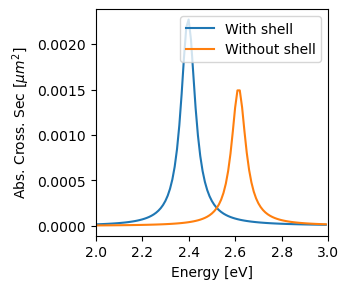

In [8]:
fig = plt.figure(figsize=(3.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)




calc_dips = CrossSections(centers=def_centers, 
                           all_radii=def_all_radii,
                           w=w_all,
                           num=num_part_per_struct, 
                           n=1.0, 
                           wp=8.959/hbar_eVs, 
                           eps_inf=9.695, 
                           gam_drude=0.073/hbar_eVs,
                           shell=5E-7,
                           shell_m=1.7
                           )    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))
plt.plot(w_all*hbar_eVs, Pabs[0, 0, :,0],label='With shell') 


calc_dips = CrossSections(centers=def_centers, 
                           all_radii=def_all_radii,
                           w=w_all,
                           num=num_part_per_struct, 
                           n=1.0, 
                           wp=8.959/hbar_eVs, 
                           eps_inf=9.695, 
                           gam_drude=0.073/hbar_eVs,
                           )    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))
plt.plot(w_all*hbar_eVs, Pabs[0, 0, :,0], label='Without shell') 

plt.legend()
plt.ylabel('Abs. Cross. Sec [$\mu m^2$]')
plt.xlabel('Energy [eV]')
plt.xlim([2,3])